## Convolutional Neural Networks

__Goals__:
- Design and implementation of CNNs.
- Understanding the different effects of linear and nonlinear activation functions.
- CNN visualization.

__DataSet__: the dataset consists of around 9K images (some grayscale and some RGB) belonging to 101 classes. The shape of each image is (64,64,3). Every image is labeled with one of the classes. The image file is contained in the folder named after the class name.

In [107]:
import numpy as np
import os
from matplotlib import pyplot as plt
import random
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers

In [108]:
#tf.test.is_gpu_available()

In [109]:
datapath = './101_ObjectCategories_resized'
categories = os.listdir(datapath)
#print(categories)

# READING THE DATASET INTO THE VARIABLE ALONG WITH THE ONE-HOT CLASS LABEL

data = []
for c in categories:
    print('Reading the class:', c, '- with label:', categories.index(c))
    classpath = os.path.join(datapath, c)
    class_num = categories.index(c)
    one_hot = np.zeros(101)
    one_hot[class_num] = 1
    for img in os.listdir(classpath):
        img_array = cv2.imread(os.path.join(classpath, img))
        data.append([img_array, one_hot])    

Reading the class: Faces - with label: 0
Reading the class: Faces_easy - with label: 1
Reading the class: Leopards - with label: 2
Reading the class: Motorbikes - with label: 3
Reading the class: accordion - with label: 4
Reading the class: airplanes - with label: 5
Reading the class: anchor - with label: 6
Reading the class: ant - with label: 7
Reading the class: barrel - with label: 8
Reading the class: bass - with label: 9
Reading the class: beaver - with label: 10
Reading the class: binocular - with label: 11
Reading the class: bonsai - with label: 12
Reading the class: brain - with label: 13
Reading the class: brontosaurus - with label: 14
Reading the class: buddha - with label: 15
Reading the class: butterfly - with label: 16
Reading the class: camera - with label: 17
Reading the class: cannon - with label: 18
Reading the class: car_side - with label: 19
Reading the class: ceiling_fan - with label: 20
Reading the class: cellphone - with label: 21
Reading the class: chair - with l

In [110]:
# SHUFFLE THE DATA 

np.random.seed(1)
np.random.shuffle(data)

In [111]:
# COPYING THE IMAGES TO X AND LABELS TO t

X = []
t = []
for images, labels in data:
    X.append(images)
    t.append(labels)
print(np.shape(X), np.shape(t))

(8677, 64, 64, 3) (8677, 101)


In [112]:
# NORMALIZING THE IMAGE DATA

X = np.asarray(X)/255
t = np.asarray(t)

# BASELINE MODEL

#### Training the model using the LeNet-5 architecture

#### Using the Categorical cross-entropy as the loss funtion to be minimized

In [113]:
model_baseline = Sequential()
model_baseline.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(64,64,3)))
model_baseline.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model_baseline.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu'))
model_baseline.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model_baseline.add(Flatten())
model_baseline.add(Dense(units=1024, activation='relu'))
model_baseline.add(Dense(units=84, activation='relu'))
model_baseline.add(Dense(units=101, activation='softmax'))

adam = optimizers.Adam(learning_rate=0.0001)
#sgd = optimizers.SGD(learning_rate=0.005, decay=1e-4, momentum=0.99)
model_baseline.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

print(model_baseline.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [114]:
baseline = model_baseline.fit(X, t, validation_split=0.1, batch_size=30, epochs=200)

Train on 7809 samples, validate on 868 samples
Epoch 1/200
7809/7809 [==============================] - 1s 150us/sample - loss: 4.2621 - accuracy: 0.1090 - val_loss: 4.0893 - val_accuracy: 0.1786
Epoch 2/200
7809/7809 [==============================] - 1s 114us/sample - loss: 3.8177 - accuracy: 0.2313 - val_loss: 3.6469 - val_accuracy: 0.2546
Epoch 3/200
7809/7809 [==============================] - 1s 118us/sample - loss: 3.4517 - accuracy: 0.2876 - val_loss: 3.4057 - val_accuracy: 0.2915
Epoch 4/200
7809/7809 [==============================] - 1s 117us/sample - loss: 3.2425 - accuracy: 0.3230 - val_loss: 3.2441 - val_accuracy: 0.3168
Epoch 5/200
7809/7809 [==============================] - 1s 117us/sample - loss: 3.0707 - accuracy: 0.3484 - val_loss: 3.0785 - val_accuracy: 0.3491
Epoch 6/200
7809/7809 [==============================] - 1s 115us/sample - loss: 2.9214 - accuracy: 0.3694 - val_loss: 2.9870 - val_accuracy: 0.3479
Epoch 7/200
7809/7809 [==============================] - 1s

7809/7809 [==============================] - 1s 114us/sample - loss: 0.0189 - accuracy: 0.9990 - val_loss: 3.8140 - val_accuracy: 0.5841
Epoch 110/200
7809/7809 [==============================] - 1s 114us/sample - loss: 0.0132 - accuracy: 0.9994 - val_loss: 3.9427 - val_accuracy: 0.5668
Epoch 111/200
7809/7809 [==============================] - 1s 113us/sample - loss: 0.0167 - accuracy: 0.9987 - val_loss: 4.1155 - val_accuracy: 0.5576
Epoch 112/200
7809/7809 [==============================] - 1s 114us/sample - loss: 0.1489 - accuracy: 0.9567 - val_loss: 3.7733 - val_accuracy: 0.5599
Epoch 113/200
7809/7809 [==============================] - 1s 113us/sample - loss: 0.0334 - accuracy: 0.9964 - val_loss: 3.8197 - val_accuracy: 0.5806
Epoch 114/200
7809/7809 [==============================] - 1s 114us/sample - loss: 0.0209 - accuracy: 0.9980 - val_loss: 3.9194 - val_accuracy: 0.5749
Epoch 115/200
7809/7809 [==============================] - 1s 113us/sample - loss: 0.0162 - accuracy: 0.9990

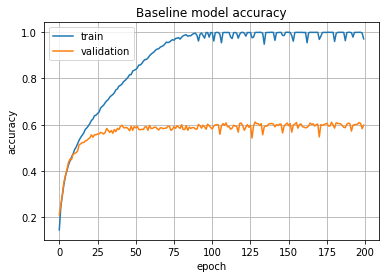

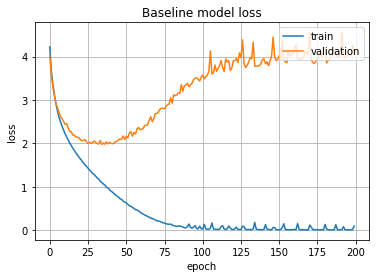

In [8]:
plt.plot(baseline.history['accuracy'])
plt.plot(baseline.history['val_accuracy'])
plt.title('Baseline model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

plt.plot(baseline.history['loss'])
plt.plot(baseline.history['val_loss'])
plt.title('Baseline model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

#### Results of the baseline model (after 100 epochs):

#### Training accuracy ~ 99% (saturation)
#### Validation accuracy ~ 60% (saturation)

#### From the above plots, we can clearly see that the baseline model is overfitting to the training data. 

#### Hence, we apply regularization techniques (such as L2(for kernel), Dropout) to prevent the overfitting.

## Regularized model

In [ ]:
# TRAINING THE MODEL USING LENET-5 ARCHITECTURE
# BACKPROPAGATING FROM THE CATEGORICAL CROSS-ENTROPY LOSS + L2 REGULARIZATION LOSS
# DROPOUT REGULARIZER ALSO INCLUDED

model_final = Sequential()
model_final.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(64,64,3)))
model_final.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model_final.add(Dropout(0.25))
model_final.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_final.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model_final.add(Dropout(0.25))
model_final.add(Flatten())
model_final.add(Dense(units=1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_final.add(Dropout(0.25))
model_final.add(Dense(units=84, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_final.add(Dropout(0.25))
model_final.add(Dense(units=101, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

adam = optimizers.Adam(learning_rate=0.0001)
#sgd = optimizers.SGD(learning_rate=0.005, decay=1e-4, momentum=0.99)
model_final.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

print(model_final.summary())

In [9]:
regularized = model_final.fit(X, t, validation_split=0.1, batch_size=30, epochs=700)

Train on 7809 samples, validate on 868 samples
Epoch 1/700
7809/7809 [==============================] - 1s 177us/sample - loss: 5.0296 - accuracy: 0.1007 - val_loss: 4.8994 - val_accuracy: 0.1624
Epoch 2/700
7809/7809 [==============================] - 1s 123us/sample - loss: 4.6773 - accuracy: 0.1731 - val_loss: 4.6192 - val_accuracy: 0.1866
Epoch 3/700
7809/7809 [==============================] - 1s 124us/sample - loss: 4.3789 - accuracy: 0.2199 - val_loss: 4.3921 - val_accuracy: 0.2177
Epoch 4/700
7809/7809 [==============================] - 1s 123us/sample - loss: 4.1820 - accuracy: 0.2333 - val_loss: 4.2035 - val_accuracy: 0.2235
Epoch 5/700
7809/7809 [==============================] - 1s 123us/sample - loss: 4.0463 - accuracy: 0.2496 - val_loss: 4.0453 - val_accuracy: 0.2500
Epoch 6/700
7809/7809 [==============================] - 1s 123us/sample - loss: 3.9397 - accuracy: 0.2696 - val_loss: 3.9301 - val_accuracy: 0.2684
Epoch 7/700
7809/7809 [==============================] - 1s

7809/7809 [==============================] - 1s 122us/sample - loss: 1.9364 - accuracy: 0.6186 - val_loss: 2.0484 - val_accuracy: 0.6371
Epoch 110/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.9285 - accuracy: 0.6174 - val_loss: 2.0428 - val_accuracy: 0.6417
Epoch 111/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.9394 - accuracy: 0.6245 - val_loss: 2.0499 - val_accuracy: 0.6336
Epoch 112/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.9172 - accuracy: 0.6231 - val_loss: 2.0522 - val_accuracy: 0.6406
Epoch 113/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.9261 - accuracy: 0.6199 - val_loss: 2.0486 - val_accuracy: 0.6440
Epoch 114/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.9082 - accuracy: 0.6261 - val_loss: 2.0308 - val_accuracy: 0.6509
Epoch 115/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.8929 - accuracy: 0.6336

7809/7809 [==============================] - 1s 122us/sample - loss: 1.5272 - accuracy: 0.7409 - val_loss: 1.9320 - val_accuracy: 0.6763
Epoch 218/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.5374 - accuracy: 0.7353 - val_loss: 1.9471 - val_accuracy: 0.6774
Epoch 219/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.5275 - accuracy: 0.7361 - val_loss: 1.9611 - val_accuracy: 0.6763
Epoch 220/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.5273 - accuracy: 0.7336 - val_loss: 1.9453 - val_accuracy: 0.6682
Epoch 221/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.5256 - accuracy: 0.7394 - val_loss: 1.9430 - val_accuracy: 0.6740
Epoch 222/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.5161 - accuracy: 0.7417 - val_loss: 1.9430 - val_accuracy: 0.6694
Epoch 223/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.5178 - accuracy: 0.7413

7809/7809 [==============================] - 1s 123us/sample - loss: 1.3338 - accuracy: 0.8054 - val_loss: 1.9918 - val_accuracy: 0.6959
Epoch 326/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.3193 - accuracy: 0.8059 - val_loss: 1.9857 - val_accuracy: 0.6901
Epoch 327/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.3335 - accuracy: 0.8038 - val_loss: 1.9792 - val_accuracy: 0.6935
Epoch 328/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.3341 - accuracy: 0.8078 - val_loss: 1.9693 - val_accuracy: 0.6901
Epoch 329/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.3265 - accuracy: 0.8092 - val_loss: 1.9992 - val_accuracy: 0.6855
Epoch 330/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.3238 - accuracy: 0.8052 - val_loss: 1.9895 - val_accuracy: 0.6959
Epoch 331/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.3239 - accuracy: 0.8091

7809/7809 [==============================] - 1s 122us/sample - loss: 1.2362 - accuracy: 0.8415 - val_loss: 2.0204 - val_accuracy: 0.6912
Epoch 434/700
7809/7809 [==============================] - 1s 120us/sample - loss: 1.2376 - accuracy: 0.8440 - val_loss: 2.0148 - val_accuracy: 0.6912
Epoch 435/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.2319 - accuracy: 0.8418 - val_loss: 2.0293 - val_accuracy: 0.6970
Epoch 436/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.2058 - accuracy: 0.8539 - val_loss: 2.0164 - val_accuracy: 0.7028
Epoch 437/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.2315 - accuracy: 0.8399 - val_loss: 2.0276 - val_accuracy: 0.7097
Epoch 438/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.2292 - accuracy: 0.8457 - val_loss: 2.0150 - val_accuracy: 0.7005
Epoch 439/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.2058 - accuracy: 0.8485

7809/7809 [==============================] - 1s 121us/sample - loss: 1.1743 - accuracy: 0.8663 - val_loss: 2.0426 - val_accuracy: 0.6993
Epoch 542/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.1708 - accuracy: 0.8680 - val_loss: 2.0328 - val_accuracy: 0.6959
Epoch 543/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.1726 - accuracy: 0.8661 - val_loss: 2.0228 - val_accuracy: 0.7039
Epoch 544/700
7809/7809 [==============================] - 1s 120us/sample - loss: 1.1716 - accuracy: 0.8707 - val_loss: 2.0145 - val_accuracy: 0.7051
Epoch 545/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.1607 - accuracy: 0.8698 - val_loss: 2.0263 - val_accuracy: 0.7028
Epoch 546/700
7809/7809 [==============================] - 1s 120us/sample - loss: 1.1863 - accuracy: 0.8669 - val_loss: 2.0352 - val_accuracy: 0.6970
Epoch 547/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.1580 - accuracy: 0.8750

7809/7809 [==============================] - 1s 122us/sample - loss: 1.1270 - accuracy: 0.8837 - val_loss: 2.0484 - val_accuracy: 0.6912
Epoch 650/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.1321 - accuracy: 0.8830 - val_loss: 2.0435 - val_accuracy: 0.7039
Epoch 651/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.1109 - accuracy: 0.8890 - val_loss: 2.0413 - val_accuracy: 0.6970
Epoch 652/700
7809/7809 [==============================] - 1s 122us/sample - loss: 1.1317 - accuracy: 0.8815 - val_loss: 2.0433 - val_accuracy: 0.6935
Epoch 653/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.1209 - accuracy: 0.8865 - val_loss: 2.0488 - val_accuracy: 0.7005
Epoch 654/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.1148 - accuracy: 0.8844 - val_loss: 2.0319 - val_accuracy: 0.7028
Epoch 655/700
7809/7809 [==============================] - 1s 121us/sample - loss: 1.1272 - accuracy: 0.8809

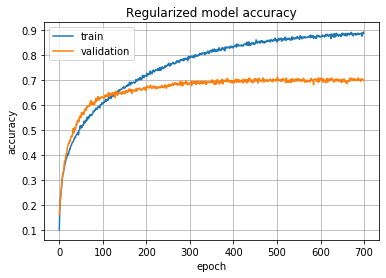

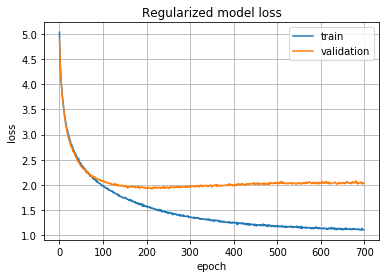

In [10]:
plt.plot(regularized.history['accuracy'])
plt.plot(regularized.history['val_accuracy'])
plt.title('Regularized model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

plt.plot(regularized.history['loss'])
plt.plot(regularized.history['val_loss'])
plt.title('Regularized model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

#### Results of the baseline model (after 100 epochs):

#### Training accuracy ~ 90%
#### Validation accuracy ~ 70%


# Comparing the baseline model to the model with linear activation functions

Here we take the baseline model and change all the activation functions to linear, in order to compare with the baseline model.

In [ ]:
model_linear = Sequential()
model_linear.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation='linear', input_shape=(64,64,3)))
model_linear.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model_linear.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='linear'))
model_linear.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model_linear.add(Flatten())
model_linear.add(Dense(units=1024, activation='linear'))
model_linear.add(Dense(units=84, activation='linear'))
model_linear.add(Dense(units=101, activation='softmax'))

adam = optimizers.Adam(learning_rate=0.0001)
#sgd = optimizers.SGD(learning_rate=0.005, decay=1e-4, momentum=0.99)
model_linear.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

print(model_linear.summary())

In [11]:
baseline_linear = model_linear.fit(X, t, validation_split=0.1, batch_size=30, epochs=200)

Train on 7809 samples, validate on 868 samples
Epoch 1/200
7809/7809 [==============================] - 1s 141us/sample - loss: 3.9233 - accuracy: 0.2090 - val_loss: 3.5920 - val_accuracy: 0.2638
Epoch 2/200
7809/7809 [==============================] - 1s 108us/sample - loss: 3.2622 - accuracy: 0.3201 - val_loss: 3.1668 - val_accuracy: 0.3306
Epoch 3/200
7809/7809 [==============================] - 1s 108us/sample - loss: 2.9023 - accuracy: 0.3755 - val_loss: 2.9284 - val_accuracy: 0.3744
Epoch 4/200
7809/7809 [==============================] - 1s 108us/sample - loss: 2.6619 - accuracy: 0.4100 - val_loss: 2.7399 - val_accuracy: 0.4055
Epoch 5/200
7809/7809 [==============================] - 1s 108us/sample - loss: 2.4782 - accuracy: 0.4488 - val_loss: 2.5996 - val_accuracy: 0.4412
Epoch 6/200
7809/7809 [==============================] - 1s 108us/sample - loss: 2.3300 - accuracy: 0.4700 - val_loss: 2.4766 - val_accuracy: 0.4493
Epoch 7/200
7809/7809 [==============================] - 1s

7809/7809 [==============================] - 1s 107us/sample - loss: 0.0613 - accuracy: 0.9857 - val_loss: 4.1655 - val_accuracy: 0.5760
Epoch 110/200
7809/7809 [==============================] - 1s 108us/sample - loss: 0.0956 - accuracy: 0.9717 - val_loss: 4.2551 - val_accuracy: 0.5956
Epoch 111/200
7809/7809 [==============================] - 1s 107us/sample - loss: 0.0900 - accuracy: 0.9769 - val_loss: 4.0333 - val_accuracy: 0.5795
Epoch 112/200
7809/7809 [==============================] - 1s 107us/sample - loss: 0.0282 - accuracy: 0.9974 - val_loss: 3.9759 - val_accuracy: 0.5945
Epoch 113/200
7809/7809 [==============================] - 1s 108us/sample - loss: 0.0233 - accuracy: 0.9982 - val_loss: 4.0386 - val_accuracy: 0.5876
Epoch 114/200
7809/7809 [==============================] - 1s 107us/sample - loss: 0.0306 - accuracy: 0.9964 - val_loss: 4.0597 - val_accuracy: 0.5945
Epoch 115/200
7809/7809 [==============================] - 1s 108us/sample - loss: 0.0184 - accuracy: 0.9990

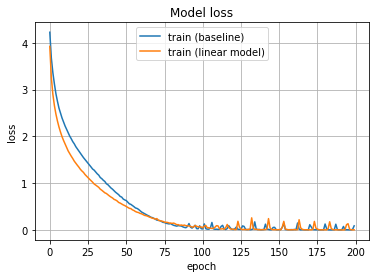

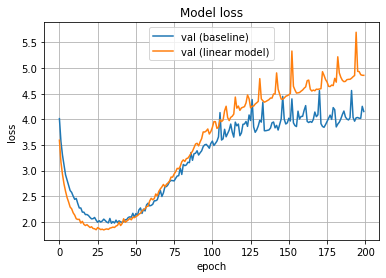

In [13]:
# plt.plot(baseline_linear.history['accuracy'])
# plt.plot(baseline_linear.history['val_accuracy'])
# plt.title('Baseline linear model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.grid()
# plt.show()

plt.plot(baseline.history['loss'])
#plt.plot(baseline.history['val_loss'])
plt.plot(baseline_linear.history['loss'])
#plt.plot(baseline_linear.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train (baseline)', 'train (linear model)'], loc='upper center')
plt.grid()
plt.show()

#plt.plot(baseline.history['loss'])
plt.plot(baseline.history['val_loss'])
#plt.plot(baseline_linear.history['loss'])
plt.plot(baseline_linear.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val (baseline)', 'val (linear model)'], loc='upper center')
plt.grid()
plt.show()

When the layer activation functions are changed to linear, the model loses its ability to fit to wide variety data mappings. This is due to the fact that all the layers with linear activation functions would be equivalent to one layer (since the composition of multiple linear functions is also a linear function), theryby nullifying the effect of having multiple layers in the architecture. Therefore the model performance is supposed to be decreased.

When comparing with the baseline model, which had ReLU activation functions, the linear model has almost the similar plots for training and validation losses as shown in the above plots. Clearly, both the models are overfit to the training data and perform poorly on the validation data. The reason for similar performance of 2 models, as opposed to the expected decrease in performance in case of linear model, could be due to the fact that the original non-linearity (ReLU) is linear in half of the universe, because of which the improvements are not significant when we replace it with fully linear activation functions.

We cannot compensate for the effect of removing the non-linearity by adding more convolution layers with linear activation functions, since all the layers (irrespective of the number) with linear activation functions are equivalent to one layer with linear activation function (since the composition of multiple linear functions is also linear). 

# Visualizing the weights of first layer

Here we are visualizing the weights of the first layer (which is the convolution layer) of the regularized non-linear model.

In [61]:
layer = model_final.layers[0]
filters, biases = layer.get_weights()
f = np.transpose(filters,(3,0,1,2))

/local-scratch/mmallya/mconda/envs/env_cmpt980_a2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


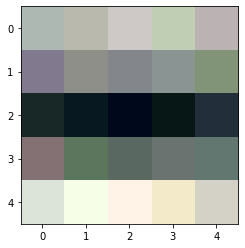

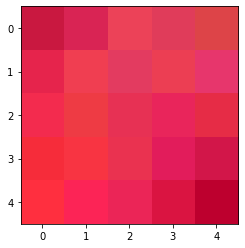

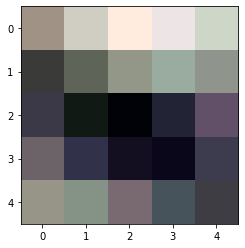

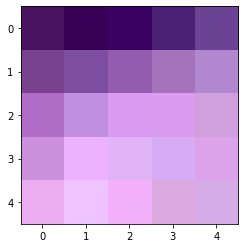

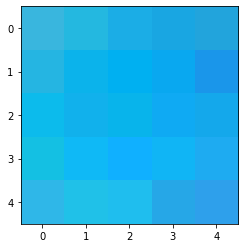

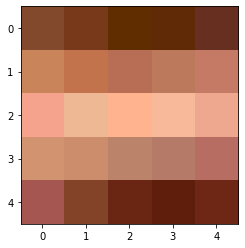

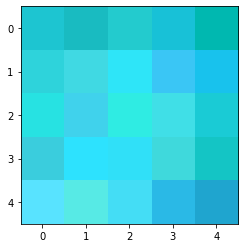

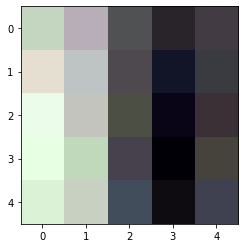

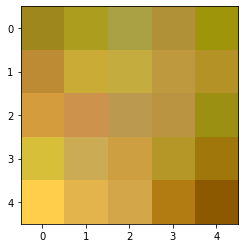

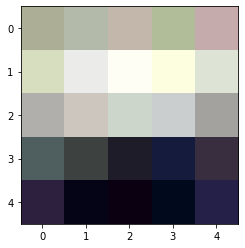

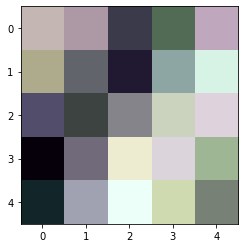

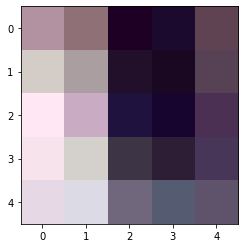

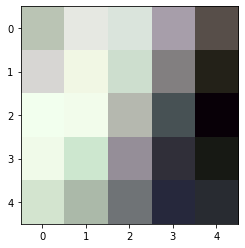

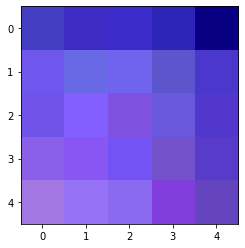

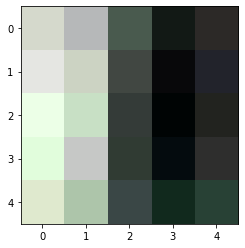

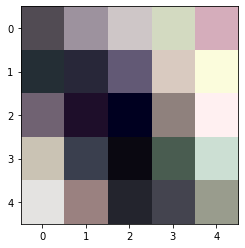

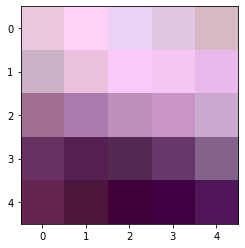

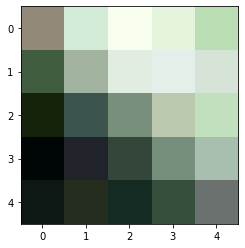

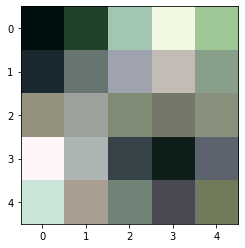

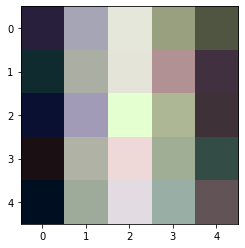

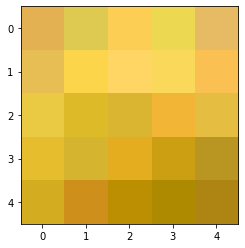

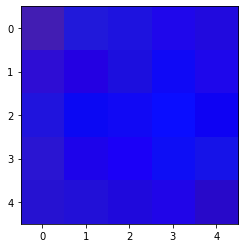

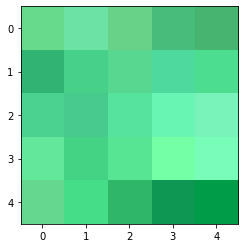

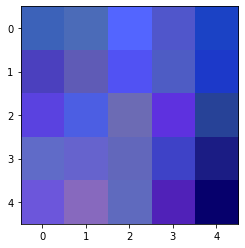

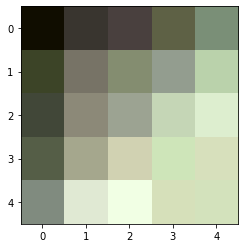

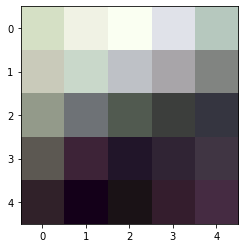

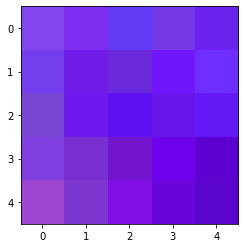

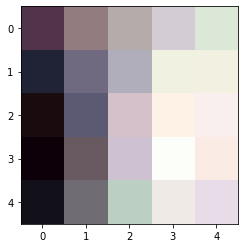

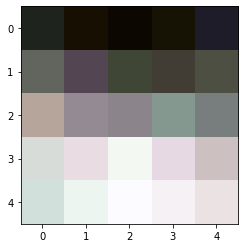

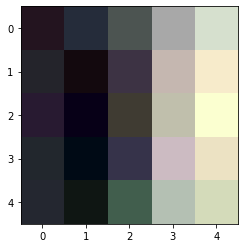

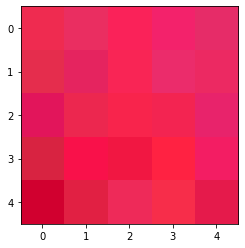

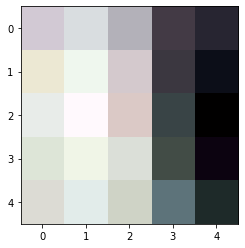

In [124]:
for i in range(32):
    img = (f[i]-np.min(f[i]))/(np.max(f[i])-np.min(f[i]))
    plt.figure()
    plt.imshow(img)
    

The first layer convolution filters after sufficient training are as shown above. These learned are supposed to detect some low level features from the input image.